<img src="https://i.imgur.com/FoKB5Z5.png" align="left" width="300" height="250" title="source: imgur.com" /></a>

## Program Code: J620-002-4:2020 

## Program Name: FRONT-END SOFTWARE DEVELOPMENT

## Title : Exe25 - k-Means Exercise

#### Name: 

#### IC Number:

#### Date :

#### Introduction : 



#### Conclusion :






# Exercise 1: Build and Plot k-Means


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Step 1:** create blobs with the size of 500, and center of 3

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, centers=3, n_features=2,random_state=0)

**Step 2:** Plot the distribution of the blobs

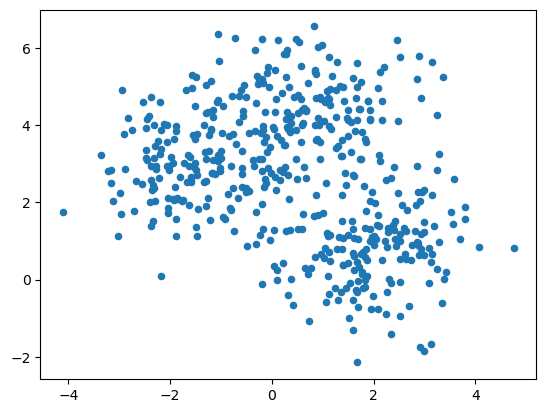

In [8]:
plt.scatter(X[:, 0], X[:, 1], s=20);

**Step 3:** Use K-means, find the centers of these clusters

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

C:\Anaconda\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


**Step 4:** Plot the blobs with the found centers

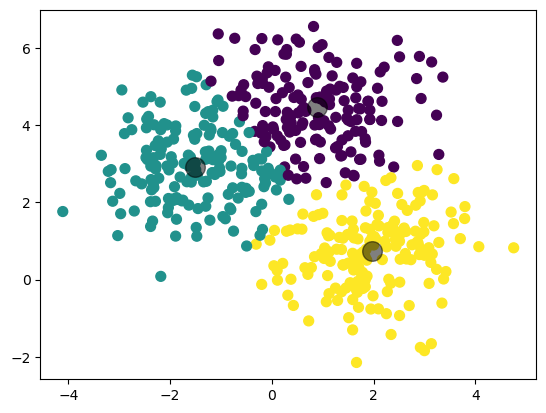

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Additional/Optional:

Step 5: How can you find out the automatically assigned "labels" in the produced clusters?

C:\Anaconda\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


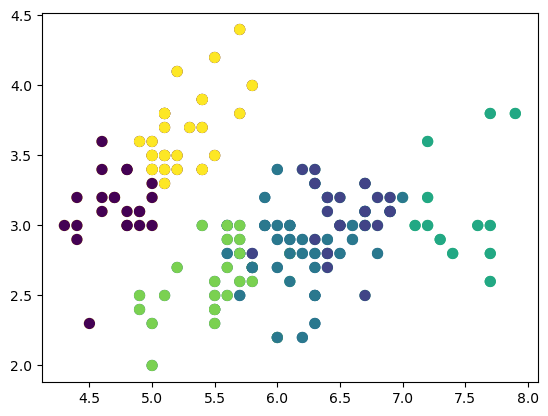

In [18]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
X, y = make_blobs(n_samples=500, centers=3, random_state=0)

Step 6: How about classes? How to find out where there are classes.

In [9]:
kmeans.n_clusters

4

# Exercise 2: k-Means with the Iris dataset


**Step 1:** Load the iris dataset from sklearn and other necessary libraries

In [10]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

**Step 2:** Set the training and target data as X and y respectively. Display the targets.

In [11]:
X = iris.data
y = iris.target

Introducing - *the Elbow Method:*
A technique to allow you to identify the best K

General idea: iterate the creation of k-Means clusters with increasing sizes, and record down the value of kmeans.inertia_ (inertia_: Sum of squared distances of samples to their closest cluster center.)

**Step 3:** create a list named wcss and store the inertia values for a selected range of ks.

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)
wcss = kmeans.inertia_
wcss

C:\Anaconda\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


152.34795176035792

**Step 4:** Plot a graph to look at 'The elbow'

C:\Anaconda\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known

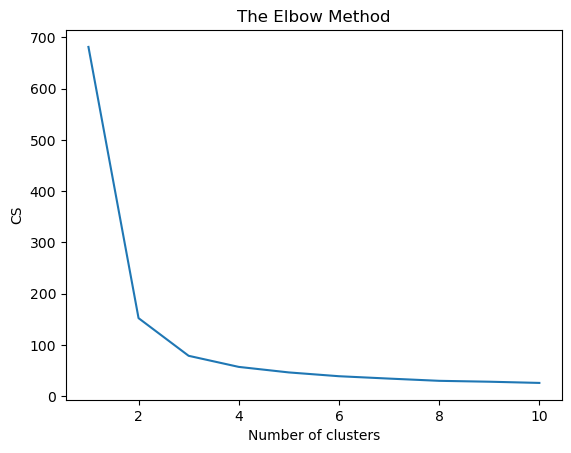

In [13]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

**Step 5:** Apply the best K for your k-means clustering

In [14]:
best_k = 2

**Step 6:** Visualize the clusters. Name the clusters accordingly, and also plot the centriods.


C:\Anaconda\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


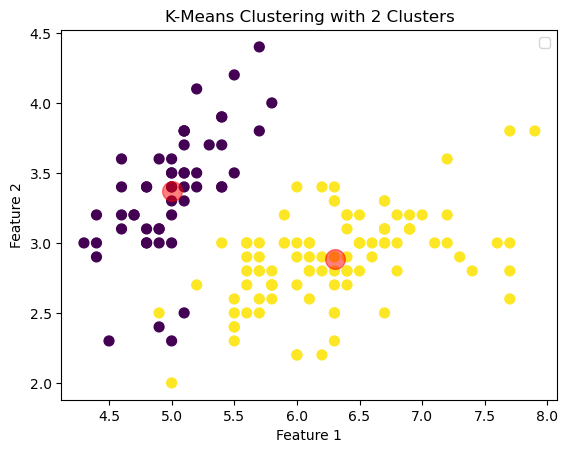

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Best K value obtained from the Elbow Method


# Initialize and fit the KMeans model with the best K value
kmeans = KMeans(n_clusters=best_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters using a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
# Plot the centroids of the clusters
plt.title('K-Means Clustering with 2 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Additional/Optional:

**Step 7:** Plot the actual and Predicted side by side

In [16]:
pd.DataFrame({'Predicted': y_kmeans, "Actual": y}).reset_index(drop=True)

,Predicted,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,1,2
146,1,2
147,1,2
148,1,2
